<ipython-input-4-6d943464e0d2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_djia['DJIA_Returns'] = data_djia['DJIA'].pct_change()


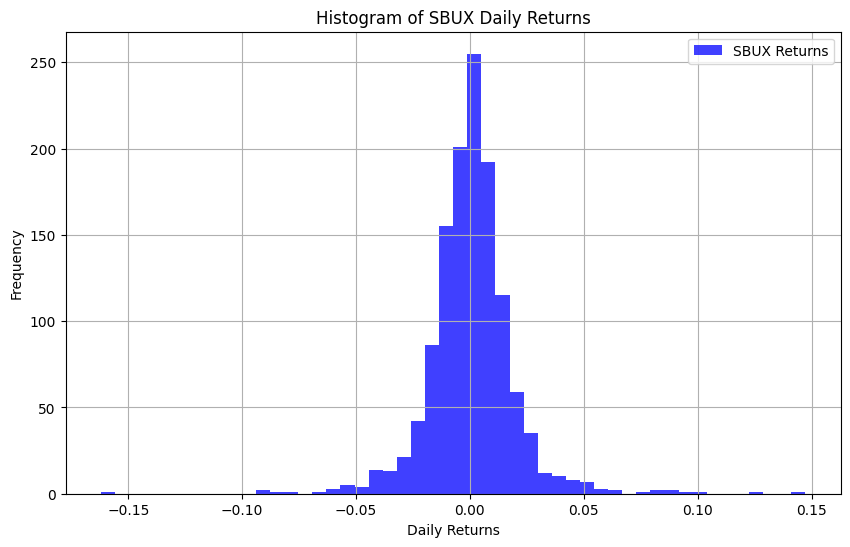

Skewness of SBUX Returns: 0.23505438435941972
Kurtosis of SBUX Returns: 10.906522047874457
Normality Test Statistic: 253.65057907653292, p-value: 8.32677036237969e-56
The daily returns do not follow a normal distribution (95% confidence).
Outliers:
           Date  SBUX_Returns
157  2019-07-26      0.089360
312  2020-03-09     -0.059862
314  2020-03-11     -0.087752
315  2020-03-12     -0.090776
316  2020-03-13      0.125926
317  2020-03-16     -0.162043
320  2020-03-19      0.090183
323  2020-03-24      0.147304
325  2020-03-26      0.062149
332  2020-04-06      0.075178
343  2020-04-22      0.065044
378  2020-06-11     -0.081509
536  2021-01-27     -0.065145
728  2021-10-29     -0.062986
815  2022-03-07     -0.061868
856  2022-05-04      0.098345
863  2022-05-13      0.081545
984  2022-11-04      0.084790
1106 2023-05-03     -0.091735
1233 2023-11-02      0.094800
Beta: 1.0951484137264222
Alpha: 3.18569184922964e-05
R-squared: 0.556845218023057
P-value: 7.244764242044506e-181


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, normaltest
import statsmodels.api as sm

# Load data from Excel files
data_djia = pd.read_excel("DJIA.xlsx")
data_sbux = pd.read_excel("SBUX.xlsx")

# Ensure dates are in datetime format
data_djia['observation_date'] = pd.to_datetime(data_djia['observation_date'])
data_sbux['Date'] = pd.to_datetime(data_sbux['Date'])

# Drop rows with missing values
data_djia = data_djia.dropna(subset=['DJIA'])
data_sbux = data_sbux.dropna(subset=['SBUX'])

# Calculate daily returns
data_djia['DJIA_Returns'] = data_djia['DJIA'].pct_change()
data_sbux['SBUX_Returns'] = data_sbux['SBUX'].pct_change()

# Drop the first row after calculating returns due to NaN values
data_djia = data_djia.dropna(subset=['DJIA_Returns'])
data_sbux = data_sbux.dropna(subset=['SBUX_Returns'])

# Task 5: Plot histogram of SBUX daily returns
plt.figure(figsize=(10, 6))
plt.hist(data_sbux['SBUX_Returns'], bins=50, alpha=0.75, color='blue', label='SBUX Returns')
plt.title('Histogram of SBUX Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Task 6: Calculate skewness and kurtosis
sbux_skewness = skew(data_sbux['SBUX_Returns'])
sbux_kurtosis = kurtosis(data_sbux['SBUX_Returns'], fisher=True)
print(f"Skewness of SBUX Returns: {sbux_skewness}")
print(f"Kurtosis of SBUX Returns: {sbux_kurtosis}")

# Task 7: Test for normality (D'Agostino and Pearson's test)
stat, p_value = normaltest(data_sbux['SBUX_Returns'])
print(f"Normality Test Statistic: {stat}, p-value: {p_value}")
if p_value > 0.05:
    print("The daily returns follow a normal distribution (95% confidence).")
else:
    print("The daily returns do not follow a normal distribution (95% confidence).")

# Task 8: Identify outliers beyond ±3 standard deviations
mean_returns = data_sbux['SBUX_Returns'].mean()
std_returns = data_sbux['SBUX_Returns'].std()
threshold = 3 * std_returns

outliers = data_sbux[(data_sbux['SBUX_Returns'] < -threshold) |
                     (data_sbux['SBUX_Returns'] > threshold)]
print(f"Outliers:\n{outliers[['Date', 'SBUX_Returns']]}")

# Task 9: (Manually analyze events for the outlier dates)

# Task 10: Perform linear regression between DJIA and SBUX returns
merged_data = pd.merge(
    data_sbux[['Date', 'SBUX_Returns']],
    data_djia[['observation_date', 'DJIA_Returns']],
    left_on='Date',
    right_on='observation_date',
    how='inner'
)

X = sm.add_constant(merged_data['DJIA_Returns'])  # Add constant for intercept
y = merged_data['SBUX_Returns']
model = sm.OLS(y, X).fit()

# Extract regression results
beta = model.params['DJIA_Returns']
alpha = model.params['const']
r_squared = model.rsquared
p_value = model.pvalues['DJIA_Returns']

print(f"Beta: {beta}")
print(f"Alpha: {alpha}")
print(f"R-squared: {r_squared}")
print(f"P-value: {p_value}")
